<a href="https://colab.research.google.com/github/EronDS/Bioinformatics/blob/main/Tools_for_Bioinformatics/2ndGenSequecingAndGenomeWBasicEDA/2ndGen.SequenceAndAnalysisWithGenome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

In [2]:
import collections
import numpy 
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import collections
import seaborn as sns
import warnings
import Bio
from Bio.Blast import NCBIWWW,NCBIXML

warnings.filterwarnings('ignore')

#Reading Genome (Fasta)

In [ ]:
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

In [4]:
fasta = 'phix.fa'

In [5]:
def read_genome(filename):
    genome = ''
    with open(filename,'r') as f:
        for line in f:
            if line[0] != '>':
                genome += line.rstrip()
            
            
            
    return genome

In [6]:
genome = read_genome(fasta)
print(genome)

GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACTAAAGGCAAGCGTAAAGGCGCTCGTCTTTGGTATGTAGGTGGTCAACAATTTTAATTGCAGGGGCTTCGGCCCCTTACTTGAGGATAAATT

# Reading 2nd Generation Sequence (Fastq)

In [ ]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

In [8]:
readings = 'ERR266411_1.first1000.fastq'

In [9]:
def reading_reads(filename):
    seqs = []
    qs = [] 
    with open(filename,'r') as r:
        while True:
            r.readline()
            seq = r.readline().rstrip()
            r.readline()
            q = r.readline().rstrip()
        
            if len(seq) == 0:
                break
            
            seqs.append(seq)
            qs.append(q)

    return seqs,qs

        
        

In [11]:
genome

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACTAAAGGCAAGCGTAAAGGCGCTCGTCTTTGGTATGTAGGTGGTCAACAATTTTAATTGCAGGGGCTTCGGCCCCTTACTTGAGGATAAAT

# Simple Analysis of Quality and Content

In [12]:
def PhredtoQconvertion(Q):
    return ord(Q) - 33

def createHistogramFrequency(Q):
    freq = [0] * 48

    for qual in Q:
        for p in qual:
            q = PhredtoQconvertion(p)
            freq[q] += 1
    plt.bar(range(0,len(freq)) , freq , color = 'skyblue')
    plt.title('Quality Distribution in 2nd Gen. Sequecing',loc = 'left')
    plt.show()
            

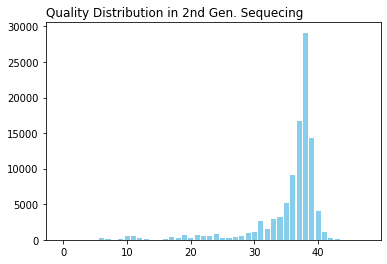

In [13]:
createHistogramFrequency(Q)

## Obtaining the Percentage of Match between the Genome and readings

In [14]:
def NaiveMatching(reads,genome):
    occs = []


    for i in range(len(genome) - len(reads) + 1 ):
        match = True
        for j in range(len(reads)):
            if genome[i + j] != reads[j]:
                match = False
                break
        if match == True:
            occs.append(i) # leftmost indexation
    return occs


def ReverseGenome(genome):
    complementaryb = {'A' : 'T' , 'C' : 'G' ,\
                      'G' : 'C' , 'T' : 'A' ,\
                      'N' : 'N'} # N = no-confidence (non-sequenced base)
    
    t = ''

    for b in genome:
        t = complementaryb[b] + t
    return t


def Match(reads, genome, slide = 30):

    n_matches, n = 0 , 0 

    for R in reads:
        r = R[:slide]
        matches = NaiveMatching(r,genome)
        matches.extend(NaiveMatching(ReverseGenome(r),genome))
        n += 1

        if len(matches) > 0:
            n_matches += 1
        
    return n_matches,n


In [15]:
reverse_genome = ReverseGenome(genome)
print(genome[:30])
print(reverse_genome[::-1][:30])

GAGTTTTATCGCTTCCATGACGCAGAAGTT
CTCAAAATAGCGAAGGTACTGCGTCTTCAA


In [16]:
n_matches , n = Match(reads,genome)

In [17]:
print('%d / %d reads have match' % (n_matches,n))
print('Fraction of Match : {}'.format(n_matches / n))

932 / 1000 reads have match
Fraction of Match : 0.932


In [18]:
def GCcontent(reads, lenght = 100):
    gc = [0] * lenght # read at len 100
    totals = [0] * lenght
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            
            totals[i] += 1
    
    for i in range(len(gc)):
        if totals[i] > 0: #avoiding error
            gc[i] /= float(totals[i]) # converting to float to make sure that truncation does not occur

    return gc



In [19]:
gc = GCcontent(reads)

(0.0, 100.0)

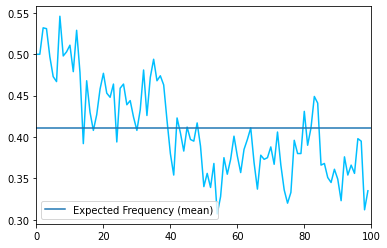

In [20]:
plt.plot(range(len(gc)) , gc, color = 'deepskyblue')
plt.axhline(y = np.mean(gc), xmax = len(gc),
            label = 'Expected Frequency (mean)')
plt.legend(loc = 'lower left')
plt.xlim(0,(len(gc)))

In [21]:
counter = collections.Counter()

for read in reads:
    counter.update(read)

counts = dict(counter)
counts

{'A': 28426, 'C': 21890, 'G': 19147, 'N': 6, 'T': 30531}

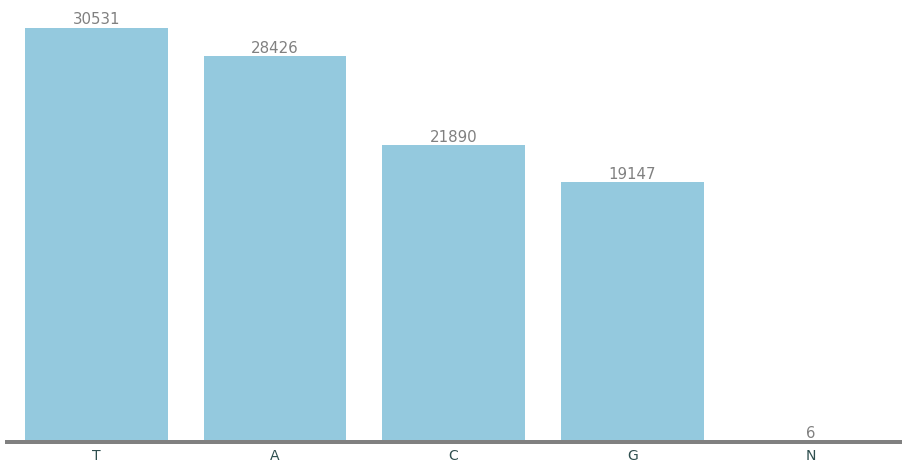

In [22]:
plt.figure(figsize = (16,8))
x = list(counts.keys())
y = list(counts.values())
fig = sns.barplot(x,y, color = 'skyblue')
for bar in fig.patches:

    fig.annotate(format(int(bar.get_height())),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha = 'center',
                 va = 'center', size = 15,
                 xytext = (0,8),  textcoords = 'offset points',
                 color = 'grey')




fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.yaxis.set_ticklabels([])
fig.tick_params(left = False)
fig.spines['bottom'].set_linewidth(4)
fig.spines['bottom'].set_edgecolor('grey')
fig.tick_params(bottom = False)
fig.tick_params(axis = 'x',
                which = 'major',
                labelsize = 14,
                color = 'grey',
                labelcolor = 'darkslategrey')



## Finding the Specie(s)
BLAST: Basic Local Alignment Search Tool
nt = nucleotides

In [23]:
result_handle = NCBIWWW.qblast('blastn','nt',genome)
result_handle

In [24]:
blast_record = NCBIXML.read(result_handle)


E_value_threshold = .01 # probability (chance)

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < E_value_threshold:
            print('--------------------Alignment--------------------')
            print('sequence:' ,alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print(hsp.query)
            print(hsp.match)
            print(hsp.sbjct)

--------------------Alignment--------------------
sequence: gi|9626372|ref|NC_001422.1| Coliphage phi-X174, complete genome >gi|216019|gb|J02482.1|PX1CG Coliphage phi-X174, complete genome >gi|1740137025|gb|MN385565.1| Escherichia virus phiX174, complete genome
length: 5386
e value: 0.0
GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTAT